In [ ]:
#%pip install ISLP

In [1]:
import numpy as np
import pandas as pd

import sklearn.model_selection as skm
import pandas as pd
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)


In [2]:
# Load the preprocessed training data
train_processed = pd.read_csv('train_processed.csv')
print("Training data shape:", train_processed.shape)
print("Columns:", train_processed.columns.tolist())

# Separate features (X) and target (y)
y_train = train_processed['Price']
X_train = train_processed.drop(columns=['Price'])


print(f"\nFeatures shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"\nTarget statistics:")
print(f"Mean price: {y_train.mean():.2f}")
print(f"Min price: {y_train.min():.2f}")
print(f"Max price: {y_train.max():.2f}")


Training data shape: (4336, 21)
Columns: ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'No. of Doors', 'Price', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Transmission_Manual', 'Transmission_Automatic', 'Owner_Type_First', 'Owner_Type_Second', 'Owner_Type_Third', 'Owner_Type_Fourth & Above', 'Colour_Others', 'Colour_Black/Silver', 'Colour_White']

Features shape: (4336, 20)
Target shape: (4336,)

Target statistics:
Mean price: 9.65
Min price: 0.44
Max price: 160.00


In [4]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val.shape}")


Training set: (3468, 20)
Validation set: (868, 20)


In [5]:
# Train a Decision Tree Regressor model
print("Training Decision Tree model...")
dt_model = DTR(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train_split, y_train_split)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train_split)
y_pred_val_dt = dt_model.predict(X_val)

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate the model
print("\n=== Decision Tree Model Performance ===")
print(f"Training R² Score: {r2_score(y_train_split, y_pred_train_dt):.4f}")
print(f"Validation R² Score: {r2_score(y_val, y_pred_val_dt):.4f}")
print(f"\nTraining RMSE: {np.sqrt(mean_squared_error(y_train_split, y_pred_train_dt)):.2f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val_dt)):.2f}")
print(f"\nTraining MAE: {mean_absolute_error(y_train_split, y_pred_train_dt):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val_dt):.2f}")
print(f"\nTraining MAPE: {calculate_mape(y_train_split, y_pred_train_dt):.2f}%")
print(f"Validation MAPE: {calculate_mape(y_val, y_pred_val_dt):.2f}%")


Training Decision Tree model...

=== Decision Tree Model Performance ===
Training R² Score: 0.8749
Validation R² Score: 0.8661

Training RMSE: 4.05
Validation RMSE: 3.96

Training MAE: 1.78
Validation MAE: 1.87

Training MAPE: 19.90%
Validation MAPE: 21.22%


In [6]:
# Train a Random Forest Regressor model
print("Training Random Forest model...")
rf_model = RF(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_split, y_train_split)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train_split)
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate the model
print("\n=== Random Forest Model Performance ===")
print(f"Training R² Score: {r2_score(y_train_split, y_pred_train_rf):.4f}")
print(f"Validation R² Score: {r2_score(y_val, y_pred_val_rf):.4f}")
print(f"\nTraining RMSE: {np.sqrt(mean_squared_error(y_train_split, y_pred_train_rf)):.2f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val_rf)):.2f}")
print(f"\nTraining MAE: {mean_absolute_error(y_train_split, y_pred_train_rf):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val_rf):.2f}")
print(f"\nTraining MAPE: {calculate_mape(y_train_split, y_pred_train_rf):.2f}%")
print(f"Validation MAPE: {calculate_mape(y_val, y_pred_val_rf):.2f}%")


Training Random Forest model...

=== Random Forest Model Performance ===
Training R² Score: 0.9150
Validation R² Score: 0.9002

Training RMSE: 3.34
Validation RMSE: 3.42

Training MAE: 1.35
Validation MAE: 1.66

Training MAPE: 15.31%
Validation MAPE: 19.11%


In [9]:
# Load test_processed.csv and predict the price
test_processed = pd.read_csv('test_processed.csv')
print("Test data shape:", test_processed.shape)
print("Test data columns:", test_processed.columns.tolist())

# Save ID column if it exists
X_test = test_processed.drop(columns=['ID'])


print(f"\nTest features shape: {X_test.shape}")
print(f"Training features shape: {X_train.shape}")

# Verify columns match between train and test
print(f"\nColumns match: {list(X_train.columns) == list(X_test.columns)}")


Test data shape: (1491, 21)
Test data columns: ['ID', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'No. of Doors', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Transmission_Manual', 'Transmission_Automatic', 'Owner_Type_First', 'Owner_Type_Second', 'Owner_Type_Third', 'Owner_Type_Fourth & Above', 'Colour_Others', 'Colour_Black/Silver', 'Colour_White']

Test features shape: (1491, 20)
Training features shape: (4336, 20)

Columns match: True


In [11]:
# Make predictions using Decision Tree model
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree Predictions ===")
print(f"Predicted prices - Min: {y_pred_dt.min():.2f}, Max: {y_pred_dt.max():.2f}, Mean: {y_pred_dt.mean():.2f}")

# Save ID and predicted Price to CSV file
submission_dt = pd.DataFrame({
    'ID': test_processed['ID'],
    'Price': y_pred_dt
})

submission_dt.to_csv('submission_decision_tree.csv', index=False)
print("\nDecision Tree submission saved as 'submission_decision_tree.csv'")


=== Decision Tree Predictions ===
Predicted prices - Min: 0.83, Max: 70.36, Mean: 9.59

Decision Tree submission saved as 'submission_decision_tree.csv'


In [ ]:
# Make predictions using Random Forest model
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest Predictions ===")
print(f"Predicted prices - Min: {y_pred_rf.min():.2f}, Max: {y_pred_rf.max():.2f}, Mean: {y_pred_rf.mean():.2f}")


In [ ]:
# Make predictions using Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

print("=== Gradient Boosting Predictions ===")
print(f"Predicted prices - Min: {y_pred_gb.min():.2f}, Max: {y_pred_gb.max():.2f}, Mean: {y_pred_gb.mean():.2f}")


In [ ]:
# Create submission file using Random Forest model (typically best performer)
submission = pd.DataFrame({
    'ID': test_ids,
    'Price': y_pred_rf
})

print("\n=== Submission File Preview ===")
print(submission.head(10))
print(f"\nSubmission shape: {submission.shape}")

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("\nSubmission file saved as 'submission.csv'")


In [ ]:
# Compare predictions from all three models
comparison = pd.DataFrame({
    'ID': test_ids,
    'Decision_Tree': y_pred_dt,
    'Random_Forest': y_pred_rf,
    'Gradient_Boosting': y_pred_gb,
    'Average': (y_pred_dt + y_pred_rf + y_pred_gb) / 3
})

print("=== Model Predictions Comparison ===")
print(comparison.head(10))
print(f"\nCorrelation between models:")
print(comparison[['Decision_Tree', 'Random_Forest', 'Gradient_Boosting']].corr())


In [7]:
# Train a Gradient Boosting Regressor model
print("Training Gradient Boosting model...")
gb_model = GBR(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

gb_model.fit(X_train_split, y_train_split)

# Make predictions
y_pred_train_gb = gb_model.predict(X_train_split)
y_pred_val_gb = gb_model.predict(X_val)

# Evaluate the model
print("\n=== Gradient Boosting Model Performance ===")
print(f"Training R² Score: {r2_score(y_train_split, y_pred_train_gb):.4f}")
print(f"Validation R² Score: {r2_score(y_val, y_pred_val_gb):.4f}")
print(f"\nTraining RMSE: {np.sqrt(mean_squared_error(y_train_split, y_pred_train_gb)):.2f}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val_gb)):.2f}")
print(f"\nTraining MAE: {mean_absolute_error(y_train_split, y_pred_train_gb):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val_gb):.2f}")
print(f"\nTraining MAPE: {calculate_mape(y_train_split, y_pred_train_gb):.2f}%")
print(f"Validation MAPE: {calculate_mape(y_val, y_pred_val_gb):.2f}%")


Training Gradient Boosting model...

=== Gradient Boosting Model Performance ===
Training R² Score: 0.9635
Validation R² Score: 0.9121

Training RMSE: 2.19
Validation RMSE: 3.21

Training MAE: 1.27
Validation MAE: 1.64

Training MAPE: 17.22%
Validation MAPE: 19.38%

=== Gradient Boosting Model Performance ===
Training R² Score: 0.9635
Validation R² Score: 0.9121

Training RMSE: 2.19
Validation RMSE: 3.21

Training MAE: 1.27
Validation MAE: 1.64

Training MAPE: 17.22%
Validation MAPE: 19.38%



=== Top 15 Most Important Features ===
               feature  importance
                 Power    0.702756
                   Age    0.167616
     Kilometers_Driven    0.041446
                Engine    0.038916
               Mileage    0.022450
                 Seats    0.006433
          Colour_White    0.005552
   Transmission_Manual    0.003998
Transmission_Automatic    0.003966
          No. of Doors    0.001767
      Fuel_Type_Diesel    0.001175
         Colour_Others    0.001173
   Colour_Black/Silver    0.000937
      Fuel_Type_Petrol    0.000755
      Owner_Type_First    0.000753


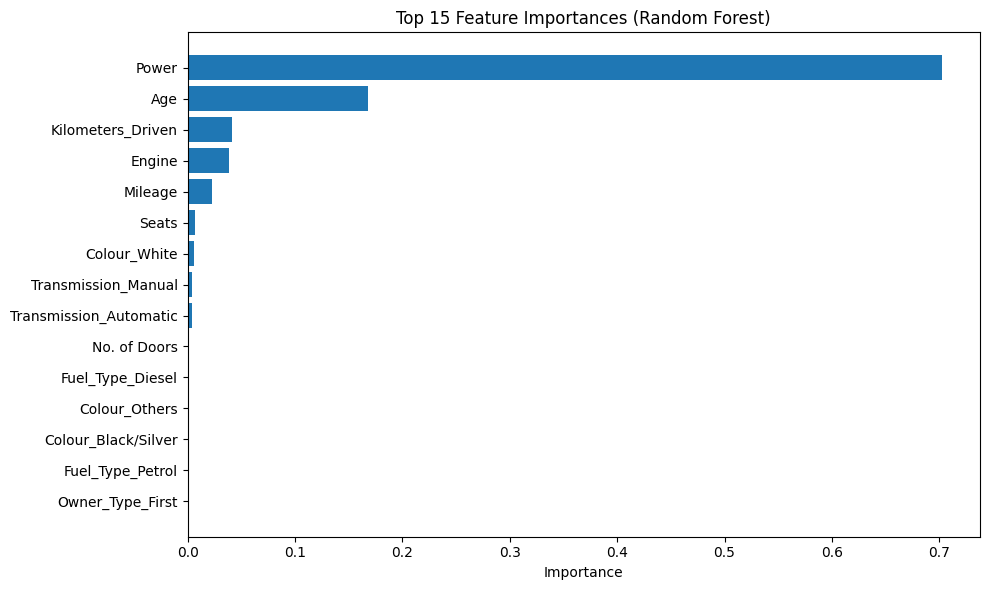

In [8]:
# Feature importance analysis (using Random Forest)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 15 Most Important Features ===")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(15)['feature'], feature_importance.head(15)['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Generate a prediction with the test_processed.csv data
# load the preprocessed training data test.csv


(1491, 23)
(1491, 2)
